In [1]:
from vggt_ba.utils import JsonRetrieval

path = "/home/emmanuel/Desktop/crocodl_challenge/experiments/visual_localization/megaloc.json"

retrieval = JsonRetrieval(path)

In [2]:
img_repo_paths, ranks, scores = retrieval.sample()

In [3]:
import os

crocodl_dataset = "/media/emmanuel/nvme_storage/datasets/crocodl_dataset"

vggt_input_abspaths = [
    os.path.join(crocodl_dataset, img_path)
    for img_path in img_repo_paths
]

In [4]:
import vggt_ba.vggt_ba.load_fn as vggt_load
images = vggt_load.load_images(vggt_input_abspaths)


import random
ref_gray = random.random() > 0.5

if ref_gray:
    new_images = [
        img.convert('L')
        for img in images[1:]
    ]
    new_images = [images[0]] + new_images
    
    images =  new_images

else:
    images[0] = images[0].convert('L')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


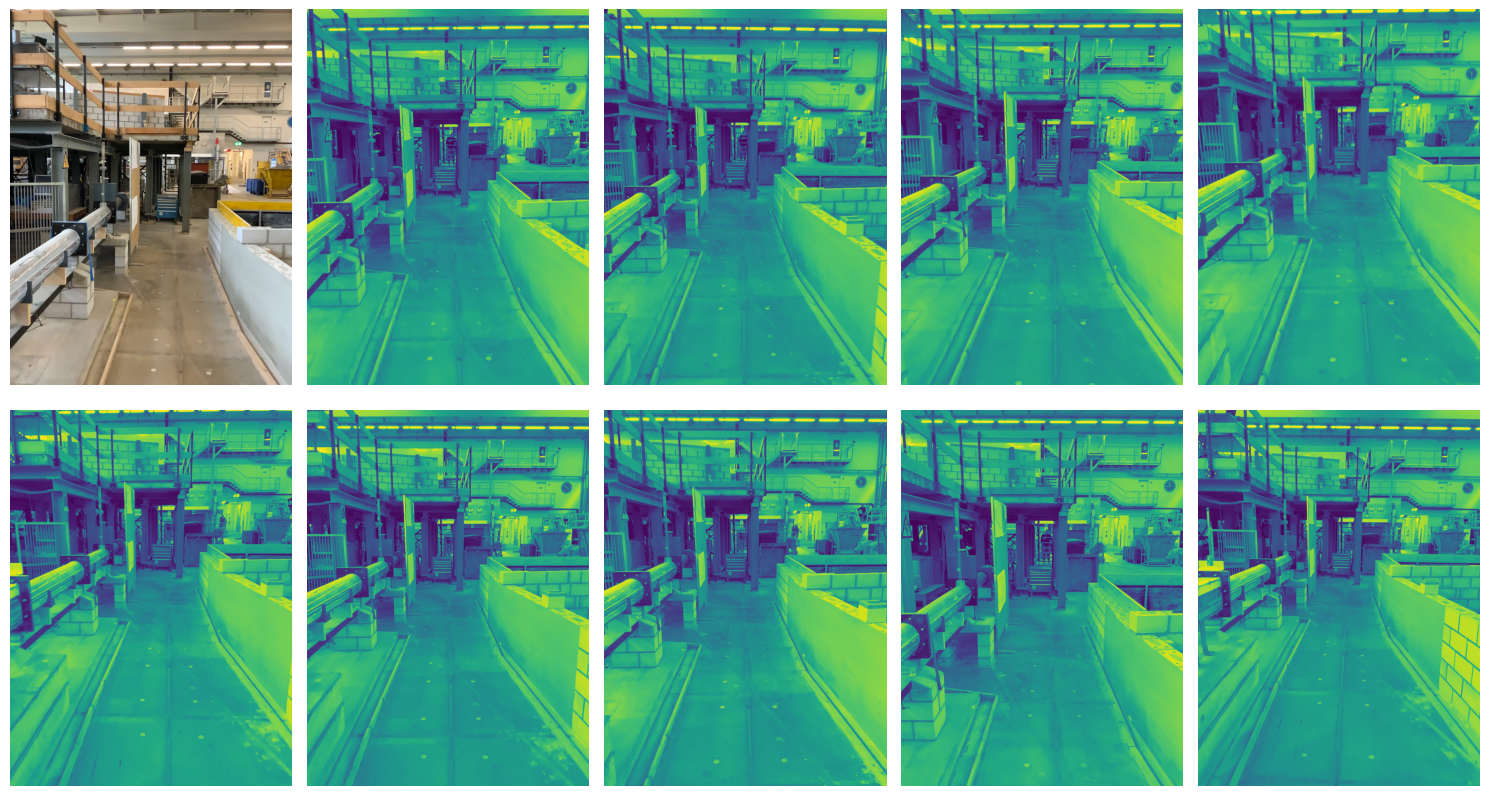

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

fig, ax = plt.subplots(2, 5, figsize=(15, 9))
axis = ax.flatten()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
for i, image in enumerate(images):
    ax = axis[i]
    img = np.asarray(image)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
from vggt_ba.vggt_ba import ApiInference as Vggt

vggt = Vggt('http://127.0.0.1:8000') #USe as microservice

predictions = vggt.run(img_list = images)

predictions['retrieval_rank'] = ranks
predictions['retrieval_score'] = scores
predictions['dataset_paths'] = img_repo_paths
predictions['image_names'] = [
    os.path.basename(path)
    for path in vggt_input_abspaths
]

Sending data to VGGT. This may take some minutes
Received predictions outputs from VGGT


/home/emmanuel/Desktop/crocodl_challenge/experiments/visual_localization/vggt_ba/utils.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


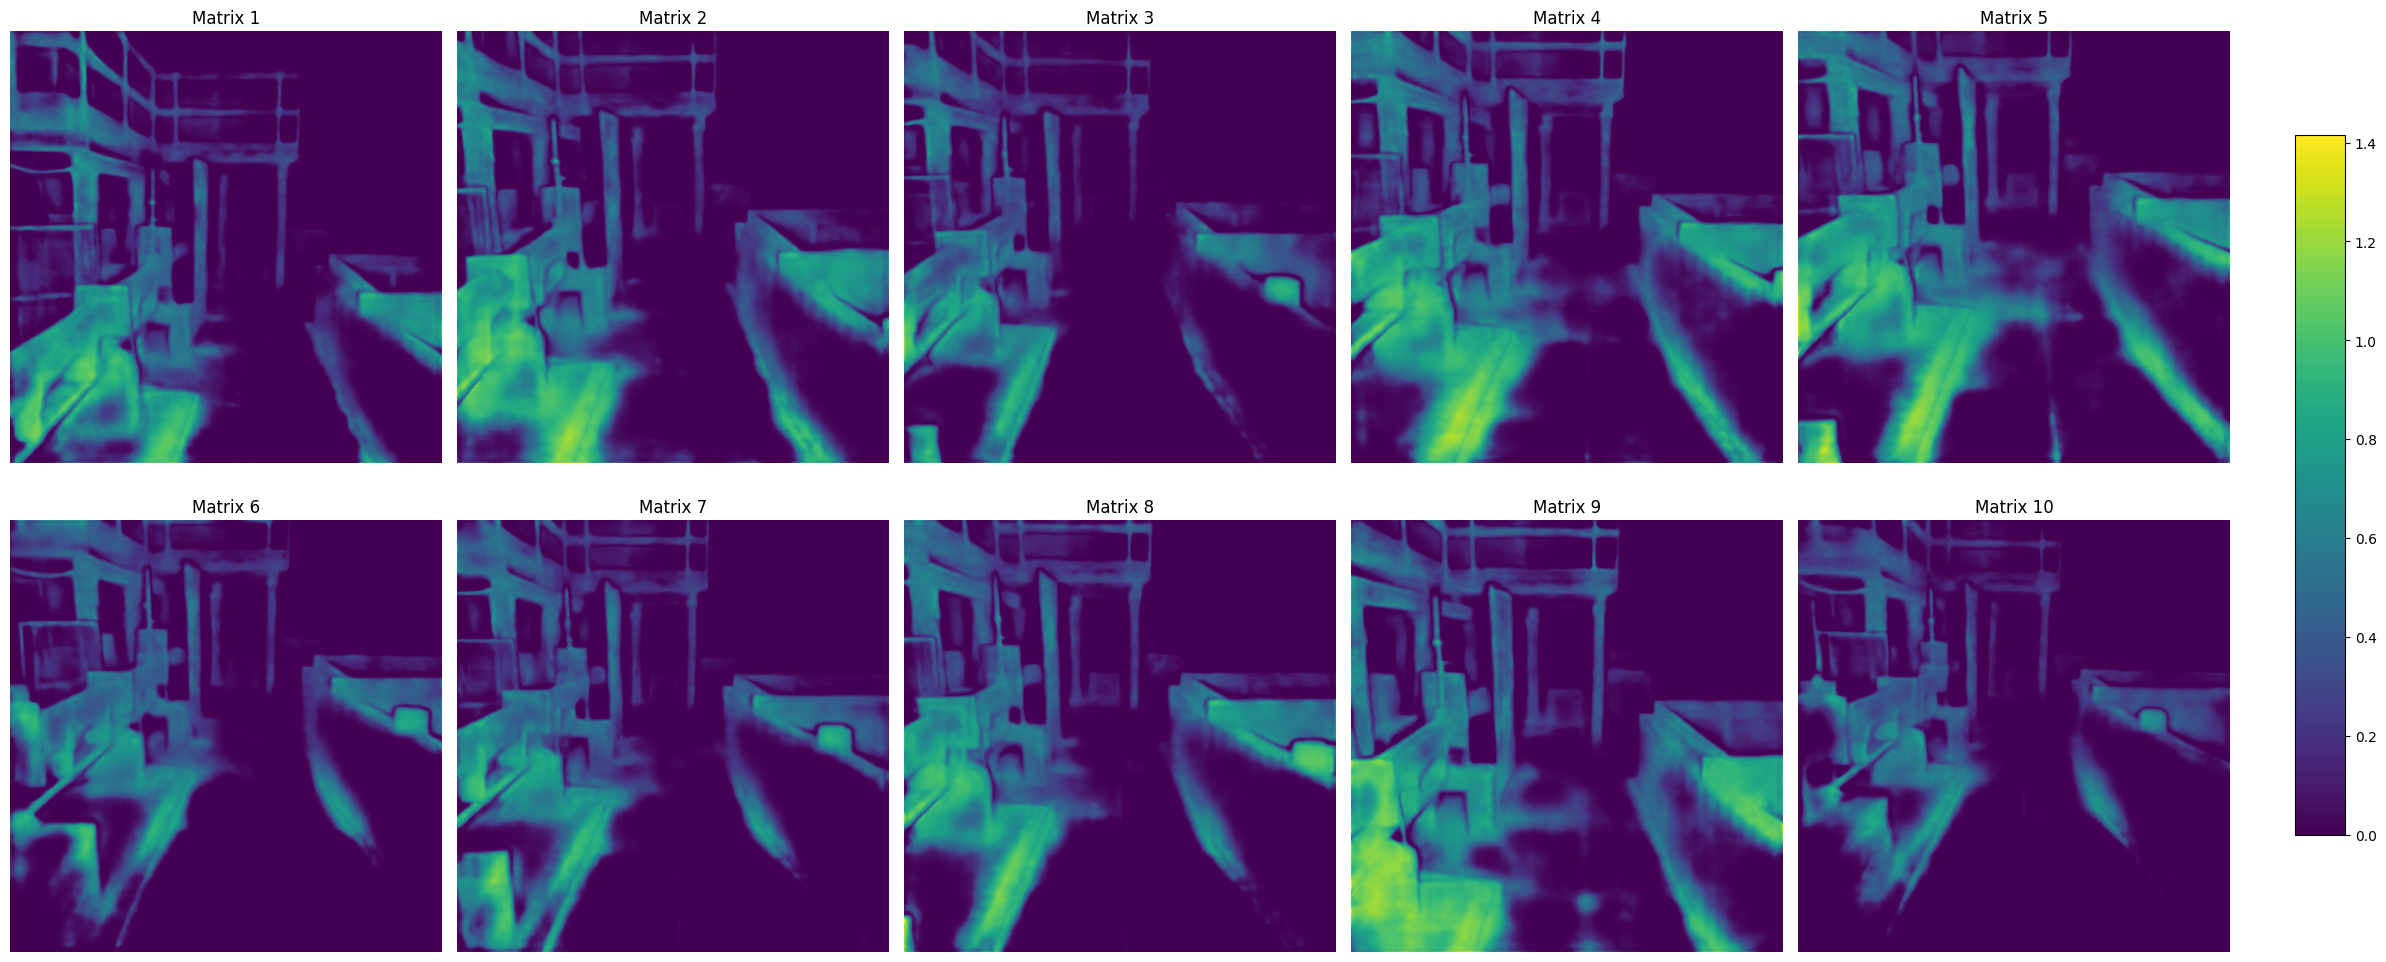

In [7]:
from vggt_ba.utils import plot_confidence_matrices_mpl

plot_confidence_matrices_mpl(predictions['depth_conf'] - 1)

In [8]:
from vggt_ba.vggt_ba import to_point_cloud

pcd = to_point_cloud(predictions, conf_thres=70, show_cam=True)

In [9]:
import open3d as o3d


o3d.visualization.draw_geometries(pcd)

In [10]:
from vggt_ba.vggt_ba import bundle_adjustment


ba_results = bundle_adjustment(predictions)

I20251002 12:13:02.481303 123353769858880 misc.cc:44] 
Global bundle adjustment
I20251002 12:13:08.620655 123353769858880 bundle_adjustment.cc:1174] Bundle adjustment report
    Residuals : 1341620
   Parameters : 2012503
   Iterations : 3
         Time : 5.29144 [s]
 Initial cost : 4.33906e-06 [px]
   Final cost : 2.58327e-14 [px]
  Termination : Convergence

I20251002 12:13:08.620683 123353769858880 timer.cc:91] Elapsed time: 0.102 [minutes]
